In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# 1. Data Processing:

In [3]:
#a)Import the data

df = pd.read_excel('default of credit card clients.xls')

In [4]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.shape

(30000, 24)

In [6]:
#b) Remove any rows that have missing data.

df.replace(["NaN", 'NaT'], np.nan, inplace = True) 
clean_df= df.dropna(axis = 0)

In [7]:
clean_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#c)set target Y 
X = clean_df.drop('default payment next month', axis =1)
y = clean_df[['default payment next month']]


In [9]:
#d) Split data into train / test set using an 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 123 )

# 2. Random Forest Classifier - Base Model:

In [10]:
#a) Using the RandomForestClassifier in sklearn. Fitting the model on the training data with a random_state

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

C:\Users\Gokturk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
#b) Using the fitted model to predict on test data. Using the .predict_proba() and the .predict()

predicted_test = clf.predict(X_test)
base_probs = clf.predict_proba(X_test)[:,1]

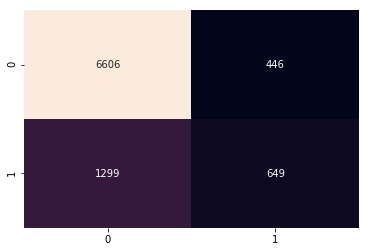

In [12]:
#c) Calculating the confusion matrix and classification report

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predicted_test)
sns.heatmap(cm, annot=True, square=False, fmt='', cbar=False)

In [13]:
print(metrics.classification_report(y_test, predicted_test, target_names=None))

             precision    recall  f1-score   support

          0       0.84      0.94      0.88      7052
          1       0.59      0.33      0.43      1948

avg / total       0.78      0.81      0.78      9000



In [14]:
#d) Calculating the roc_auc_score for this model

# limit to probability for class = 1 
base_probs = clf.predict_proba(X_test)[:,1]

# calculating roc_auc_score
print(roc_auc_score(y_test, base_probs))

0.7256316308536993


In [15]:
#e) Calculating the predictions for the training data & building the classification report & roc_auc_score. 

# There are signs of overfitting, as classification report for training set has higher precision also difference between roc scores
#for test and train sets

predicted_train = clf.predict(X_train)
print(metrics.classification_report(y_train, predicted_train, target_names=None))

# calculate roc_auc_score

# limit to probability for class = 1 
base_probs_train = clf.predict_proba(X_train)[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_train, base_probs_train))


             precision    recall  f1-score   support

          0       0.98      1.00      0.99     16312
          1       0.99      0.92      0.95      4688

avg / total       0.98      0.98      0.98     21000

0.999002846268247


# 3. Random Forest Classifier - Grid Search:

In [16]:
#a) Using the RandomForestClassifier along with the GridSearchCV tool.

#creating a dictionary of parameters 
param_grid = {'max_depth':[6, 8, 10, 12],'max_features':[2,4,'sqrt'],'n_estimators': [5, 100, 500],
'random_state':[0]}

# creating Random Forest model 
rf_obj=RandomForestClassifier()

# Creating gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

rf_Grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   42.4s


KeyboardInterrupt: 

In [81]:
#b) Identifying the best performing model:
print(rf_Grid.best_params_) 
print(rf_Grid.best_estimator_)

{'max_depth': 10, 'max_features': 4, 'n_estimators': 100, 'random_state': 0}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [53]:
#c) Using the best estimator model to predict on test data. 
#Using the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

bestEst = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

bestClf = bestEst.fit(X_train,y_train)

bestClf_predict = bestClf.predict(X_test) 



C:\Users\Gokturk\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


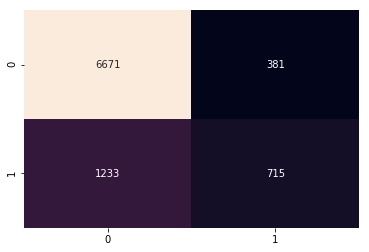

In [82]:
#d) Calculating the confusion matrix and classification report 

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, bestClf_predict)
sns.heatmap(cm, annot=True, square=False, fmt='', cbar=False)

In [83]:
print(metrics.classification_report(y_test, bestClf_predict, target_names=None))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7052
          1       0.65      0.37      0.47      1948

avg / total       0.80      0.82      0.80      9000



In [56]:
#e) Calculating the roc_auc_score for this model.

# limit to probability for class = 1 
base_probs_best = bestClf.predict_proba(X_test)[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_best))

0.7778221056021506


             precision    recall  f1-score   support

          0       0.86      0.98      0.92     16312
          1       0.84      0.46      0.59      4688

avg / total       0.86      0.86      0.84     21000

0.8593083339052301


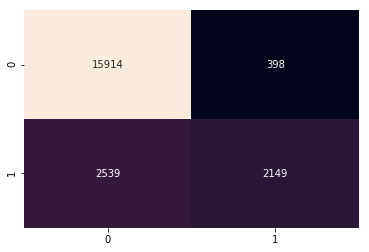

In [74]:
#f) Calculating predictions for the training data & building the confusion matrix, classification report & roc_auc_score
# There are no signs of overfitting as classification reports and Auc scores for train and test gives similar results.

bestClf_predict_train = bestClf.predict(X_train)
cm=confusion_matrix(y_train, bestClf_predict_train)
sns.heatmap(cm, annot=True, square=False, fmt='', cbar=False)
print(metrics.classification_report(y_train, bestClf_predict_train, target_names=None))

# limit to probability for class = 1 
base_probs_best_train = bestClf.predict_proba(X_train)[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_train, base_probs_best_train))

# 4. Creating a feature importance plot for the best performing model.

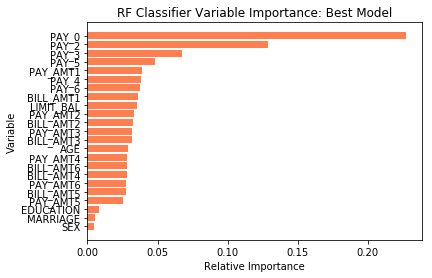

In [102]:
rf_importances = bestClf.feature_importances_
sorted_indices = np.argsort(rf_importances)
y_pos = range(len(rf_importances))

# plotting 
plt.barh(y_pos, rf_importances[sorted_indices], align='center', color ='coral') 
plt.yticks(y_pos,X_test.columns[sorted_indices]) 
plt.title("RF Classifier Variable Importance: Best Model") # title 
plt.xlabel("Relative Importance") #x axis label 
plt.ylabel("Variable") # y axis label 
plt.show()

In [72]:
# Top 5 features are : ’PAY_0’, ’PAY_2’, ’PAY_3’, ’PAY_5’,'PAY_AMT1'